<a href="https://colab.research.google.com/github/EVAPhase2/CodeRepository/blob/master/Assignment3/EVA4Part2Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import dlib
import cv2
import numpy as np
#from renderFace import renderFace
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def writeLandmarkToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'W') as f:
    for p in landmarks.part():
      f.write(" %s %s \n" %(int(p.x), int(p.y)))
    f.close()

  
PREDICTOR_PATH = "/content/drive/My Drive/Images/shape_predictor_68_face_landmarks.dat" 




In [2]:
faceDetector = dlib.get_frontal_face_detector()

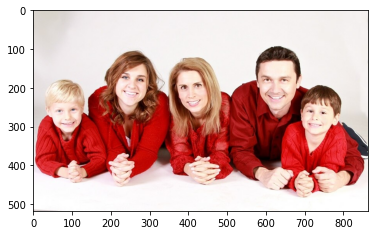

In [3]:
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

imageFilename = "/content/drive/My Drive/Images/family.jpg"
im = cv2.imread(imageFilename)

landmarksBasename = "/content/drive/My Drive/result/family"

plt.imshow(im[:,:,::-1])
plt.show()

# New Section

In [4]:
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

landmarksAll =[]

Number of faces detected:  5


In [6]:
import cv2
import numpy as np

def drawpolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im,[points], isClosed,(255,200,0), thickness=2, lineType=cv2.LINE_8)

In [7]:
def renderFace2(im, landmarks, color=(0,255,0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x,p.y), radius, color, -1)

In [8]:
def renderFace(im, landmarks):
  assert(landmarks.num_parts==68)
  drawpolyline(im, landmarks,0,16)  #jaw line
  drawpolyline(im, landmarks,17,21)  #left eyebrow
  drawpolyline(im, landmarks,22,26)  #Right eyebrow
  drawpolyline(im, landmarks,27,30)  #Nose Bridge
  drawpolyline(im, landmarks,30,35, True)  #Lower nose
  drawpolyline(im, landmarks,36,41, True)  #Left eye
  drawpolyline(im, landmarks,42,47, True)  #Right eye
  drawpolyline(im, landmarks,48,59, True)  #Outer lip
  drawpolyline(im, landmarks,60,67, True)  #inner lip

In [9]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
     # print(str(p.x)+'  '+str(p.y))
      f.write("%s %s\n" %(int(p.x),int(p.y)))
    f.close()

In [10]:
print(len(faceRects))
for i in range(0, len(faceRects)):
  newRect = dlib.rectangle(int(faceRects[i].left()),
                           int(faceRects[i].top()),
                           int(faceRects[i].right()),
                           int(faceRects[i].bottom()))
  
  landmarks = landmarkDetector(im, newRect)

  if i==0:
    print("Number of landmarks", len(landmarks.parts()))

  landmarksAll.append(landmarks)

  renderFace(im, landmarks)

  landmarksFileName = landmarksBasename +" "+str(i)+".txt"
  print("Saving landmarks to", landmarksFileName)
  writeLandmarksToFile(landmarks, landmarksFileName)

5
Number of landmarks 68
Saving landmarks to /content/drive/My Drive/result/family 0.txt
Saving landmarks to /content/drive/My Drive/result/family 1.txt
Saving landmarks to /content/drive/My Drive/result/family 2.txt
Saving landmarks to /content/drive/My Drive/result/family 3.txt
Saving landmarks to /content/drive/My Drive/result/family 4.txt


In [11]:
outputFileName = "/content/drive/My Drive/result/familyLandmarks.jpg"
print("Saving output image to", outputFileName)

cv2.imwrite(outputFileName, im)

Saving output image to /content/drive/My Drive/result/familyLandmarks.jpg


True

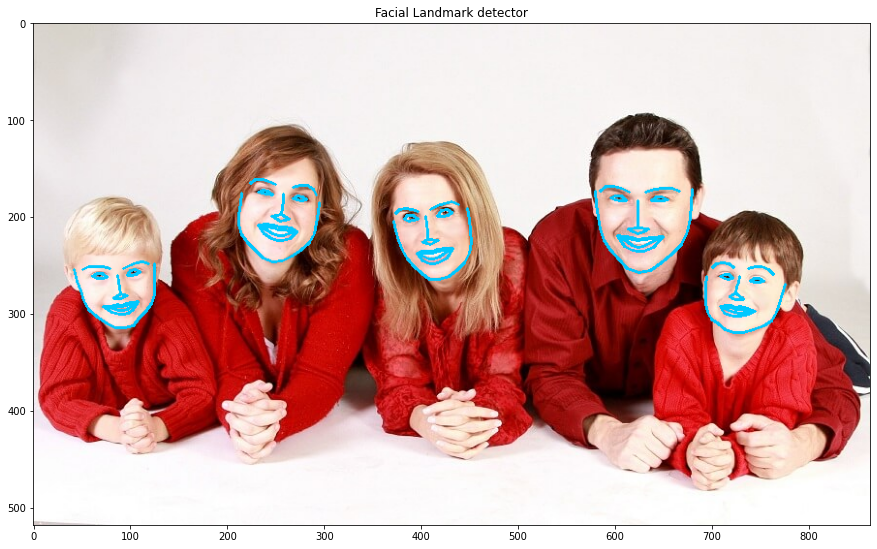

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark detector")
plt.show()

In [ ]:
!wget http://dlib.net/files/shape_predictor_5face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5face_landmarks.dat.bz2

--2020-08-12 12:43:24--  http://dlib.net/files/shape_predictor_5face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-08-12 12:43:24 ERROR 404: Not Found.

bzip2: Can't open input file shape_predictor_5face_landmarks.dat.bz2: No such file or directory.


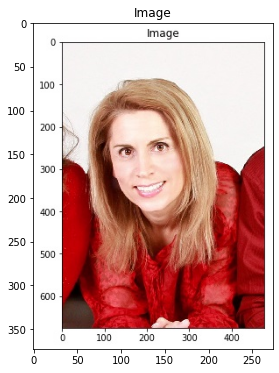

In [15]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
#from dataPath import DATA_PATH
#from dataPath import MODEL_PATH
import matplotlib.pyplot as plt
from skimage import transform as tf

import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] ='gray'

PREDICTOR_PATH ="/content/drive/My Drive/Images/shape_predictor_5_face_landmarks.dat"

faceDetector = dlib.get_frontal_face_detector()

landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

im = cv2.imread("/content/drive/My Drive/Images/pic2.jpg")#+"images/face2.png")

plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.show()

In [16]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

points = np.array(points)

im = np.float32(im)/255.0

In [17]:
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w =outSize

  if len(pointsIn) == 68:
    #print("condition 1")
    eyecornerSrc = [pointsIn[36], pointsIn[45]]
  elif len(pointsIn) == 5:
    #print("condition 2")
    eyecornerSrc =[pointsIn[2], pointsIn[0]]
 
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)), (np.int(0.7 *w), np.int(h/3))]

  tform = tf.SimilarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  imOut = cv2.wrapAffine(imIn, tform, (W, h))

  points2 = np.reshape(pointsIn, (pointsIn.shape[0], 1, pointsIn.shape[1]))

  pointsOut = cv2.transform(points2, tform)

  pointsOut = np.reshape(pointsOut,(pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut
   

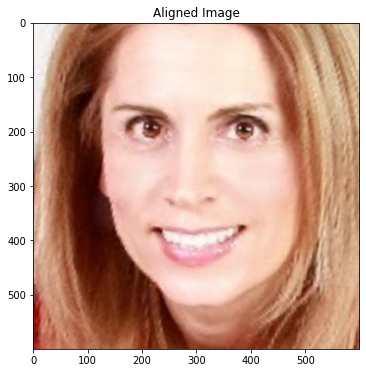

In [18]:
h= 600
w= 600

imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

imNorm = np.uint8(imNorm*255)

plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()